<a href="https://colab.research.google.com/github/Amirlabbaci/Diseases-detection/blob/master/Covid_19_Detection_Cough_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
# import les packages
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense



In [ ]:
!unrar x Data.rar


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Prepare the train and validation data
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory('/content/Data/train',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 1516 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [ ]:
# Train the model
his=model.fit(train_generator, epochs=100, validation_data=val_generator)


Epoch 1/100
48/48 [==============================] - 62s 1s/step - loss: 0.5863 - accuracy: 0.7038 - val_loss: 0.5332 - val_accuracy: 0.7361
Epoch 2/100
48/48 [==============================] - 61s 1s/step - loss: 0.5505 - accuracy: 0.7375 - val_loss: 0.5173 - val_accuracy: 0.7685
Epoch 3/100
48/48 [==============================] - 61s 1s/step - loss: 0.5357 - accuracy: 0.7474 - val_loss: 0.5018 - val_accuracy: 0.7546
Epoch 4/100
48/48 [==============================] - 60s 1s/step - loss: 0.5056 - accuracy: 0.7691 - val_loss: 0.4684 - val_accuracy: 0.8148
Epoch 5/100
48/48 [==============================] - 59s 1s/step - loss: 0.5327 - accuracy: 0.7500 - val_loss: 0.4692 - val_accuracy: 0.8056
Epoch 6/100
48/48 [==============================] - 60s 1s/step - loss: 0.4860 - accuracy: 0.7744 - val_loss: 0.4500 - val_accuracy: 0.8148
Epoch 7/100
48/48 [==============================] - 60s 1s/step - loss: 0.4651 - accuracy: 0.7876 - val_loss: 0.4271 - val_accuracy: 0.8333
Epoch 8/100
4

In [ ]:
# Prepare the test data
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    '/content/Data/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 435 images belonging to 2 classes.


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

14/14 [==============================] - 7s 475ms/step - loss: 0.0849 - accuracy: 0.9701
Test loss: 0.085
Test accuracy: 0.970


In [ ]:
# Generate predictions on test data
y_pred = model.predict(test_generator).flatten()
y_true = test_generator.classes

14/14 [==============================] - 6s 403ms/step


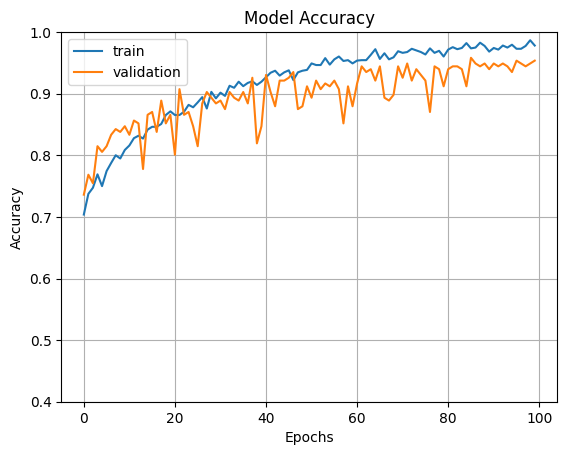

In [ ]:
#plot model Accuracy
fig1 = plt.gcf()
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

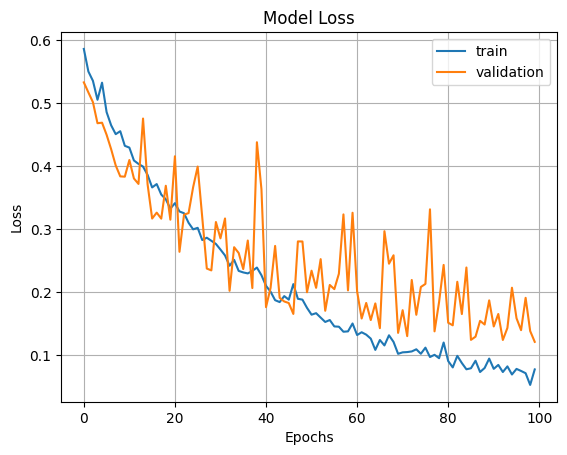

In [ ]:
#plot Model loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


In [ ]:
#save the model
model.save('my_scratch100.h5')

In [ ]:
# Print classification report
target_names = ['negative', 'positive']  # Replace with your class names
print(classification_report(y_true, np.round(y_pred), target_names=target_names))


              precision    recall  f1-score   support

    negative       0.99      0.95      0.97       215
    positive       0.96      0.99      0.97       220

    accuracy                           0.97       435
   macro avg       0.97      0.97      0.97       435
weighted avg       0.97      0.97      0.97       435



In [ ]:
#single data point prediction
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/content/Data/test/positive/0c35e382-31cd-42cb-bc87-8a84b9c52a41.png'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Make a prediction
prediction = model.predict(img_array)

# Print the prediction
if prediction[0] < 0.5:
    print("The image is in the 'negative' class")
else:
    print("The image is in the 'positive' class")


1/1 [==============================] - 0s 27ms/step
The image is in the 'positive' class
